In [1]:
import findspark
findspark.init()
import pyspark
import random
from pyspark.sql.functions import *
import pyspark.sql.functions as f
import pyspark.sql.functions as pyf
import numpy as np
import pandas 

In [2]:
# Import other modules not related to PySpark
import os
import sys
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import math
from IPython.core.interactiveshell import InteractiveShell
from datetime import *
import statistics as stats
# This helps auto print out the items without explixitly using 'print'
InteractiveShell.ast_node_interactivity = "all" 
%matplotlib inline

In [3]:
# Import PySpark related modules
import pyspark
from pyspark.rdd import RDD
from pyspark.sql import Row
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import functions
from pyspark.sql.functions import lit, desc, col, size, array_contains\
, isnan, udf, hour, array_min, array_max, countDistinct
from pyspark.sql.types import *

In [4]:
from pyspark.sql import SparkSession


spark = SparkSession \
            .builder \
            .appName("foo") \
            .config("spark.jars",  "/root/postgresql-42.4.0.jar ") \
            .getOrCreate() \

df = spark.read \
     .format("jdbc") \
     .option("url", "jdbc:postgresql://fndca5b:5432/billing") \
     .option("dbtable", "billinginfo") \
     .option("user", "enstore_reader") \
     .option("driver", "org.postgresql.Driver") \
     .option("numPartitions", "1") \
     .option("fetchsize", 1000) \
     .load()
spark.sparkContext.setLogLevel("WARN")


/usr/local/lib/python3.6/site-packages/pyspark/context.py:238: FutureWarning: Python 3.6 support is deprecated in Spark 3.2.
  FutureWarning


In [5]:
pd.DataFrame(df.dtypes, columns = ['Column Name','Data type'])

,Column Name,Data type
0,client,string
1,initiator,string
2,isnew,boolean
3,protocol,string
4,transfersize,bigint
5,fullsize,bigint
6,storageclass,string
7,connectiontime,bigint
8,action,string
9,cellname,string


In [6]:
df_month= df.filter((df.datestamp >= '2022-06-22 00:00:00') & (df.datestamp <'2022-06-22 06:00:00'))
df_month.select('datestamp').show(100)

+--------------------+
|           datestamp|
+--------------------+
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22 00:00:...|
|2022-06-22

In [7]:
df_month.count()

1691338

In [8]:
df_month.select('datestamp','transfersize','fullsize','connectiontime').describe().show()

+-------+-------------------+--------------------+------------------+
|summary|       transfersize|            fullsize|    connectiontime|
+-------+-------------------+--------------------+------------------+
|  count|            1691338|             1691338|           1691338|
|   mean|1.537006027447914E8|3.3723347551084524E8|181791.99943417578|
| stddev| 8.52809593158018E8|1.2795197785990376E9|  766688.164108149|
|    min|                  0|                   0|                 0|
|    max|       603980992584|        603980992584|          39439670|
+-------+-------------------+--------------------+------------------+



In [9]:
from pyspark.sql import functions as F
df_month= df_month.withColumn("date", to_date(df.datestamp))
df_month.select('date').show(100)
df_month= df_month.withColumn("time", date_format('datestamp', 'HH'))
df_month.select('time').show(100)
df_month= df_month.withColumn("hour", F.date_trunc('hour',F.to_timestamp("datestamp","yyyy-MM-dd HH:mm:ss 'UTC'")))
df_month.select('hour').show(100)

+----------+
|      date|
+----------+
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|
|2022-06-22|

In [10]:
pd.DataFrame(df_month.dtypes, columns = ['Column Name','Data type'])

,Column Name,Data type
0,client,string
1,initiator,string
2,isnew,boolean
3,protocol,string
4,transfersize,bigint
5,fullsize,bigint
6,storageclass,string
7,connectiontime,bigint
8,action,string
9,cellname,string


In [11]:
df1= df_month.select('hour' ,'transfersize' )
df1.show(100)

+-------------------+------------+
|               hour|transfersize|
+-------------------+------------+
|2022-06-22 00:00:00|   101494602|
|2022-06-22 00:00:00|    40026724|
|2022-06-22 00:00:00|    99830532|
|2022-06-22 00:00:00|   246421431|
|2022-06-22 00:00:00|    39484920|
|2022-06-22 00:00:00|    56552738|
|2022-06-22 00:00:00|        2653|
|2022-06-22 00:00:00|    49184495|
|2022-06-22 00:00:00|   100571638|
|2022-06-22 00:00:00|   832753944|
|2022-06-22 00:00:00|     5706045|
|2022-06-22 00:00:00|    14605397|
|2022-06-22 00:00:00|   538089423|
|2022-06-22 00:00:00|   323725824|
|2022-06-22 00:00:00|       68692|
|2022-06-22 00:00:00|    55106340|
|2022-06-22 00:00:00|    47629013|
|2022-06-22 00:00:00|     1990632|
|2022-06-22 00:00:00|    47793081|
|2022-06-22 00:00:00|       68692|
|2022-06-22 00:00:00|    76024496|
|2022-06-22 00:00:00|   249556901|
|2022-06-22 00:00:00|   259395741|
|2022-06-22 00:00:00|   197415192|
|2022-06-22 00:00:00|   508905887|
|2022-06-22 00:00:00

In [12]:
import pyspark.pandas as ps
import pyarrow

In [13]:
spark.conf.set("spark.sql.execution.arrow.enabled", "true")
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")
spark.conf.set("spark.sql.execution.arrow.pyspark.fallback.enabled", "true")

In [14]:
#pd_df = df1.toPandas()

In [15]:
pd_df = df1.toPandas()
print(pd_df)

                       hour  transfersize
0       2022-06-22 00:00:00     101494602
1       2022-06-22 00:00:00      40026724
2       2022-06-22 00:00:00      99830532
3       2022-06-22 00:00:00     246421431
4       2022-06-22 00:00:00      39484920
...                     ...           ...
1691333 2022-06-22 05:00:00       1099901
1691334 2022-06-22 05:00:00      45228085
1691335 2022-06-22 05:00:00         68836
1691336 2022-06-22 05:00:00      48616251
1691337 2022-06-22 05:00:00      11025375

[1691338 rows x 2 columns]


In [16]:
pd_df.groupby(['hour']).sum()

,transfersize
hour,
2022-06-22 00:00:00,36414308203101
2022-06-22 01:00:00,39706943766106
2022-06-22 02:00:00,54795150206157
2022-06-22 03:00:00,45092759171278
2022-06-22 04:00:00,40864325869586
2022-06-22 05:00:00,43086182828942


In [17]:
pd4=pd_df.groupby(['hour']).sum()
print(pd4)

                       transfersize
hour                               
2022-06-22 00:00:00  36414308203101
2022-06-22 01:00:00  39706943766106
2022-06-22 02:00:00  54795150206157
2022-06-22 03:00:00  45092759171278
2022-06-22 04:00:00  40864325869586
2022-06-22 05:00:00  43086182828942


<AxesSubplot:xlabel='hour'>

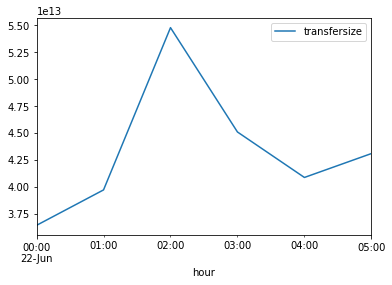

In [18]:
pd4.plot(kind = 'line')

<AxesSubplot:ylabel='Frequency'>

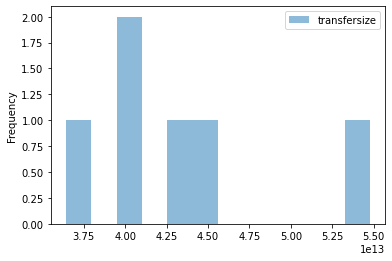

In [21]:
pd4.plot.hist(bins=12, alpha=0.5)